02/05/17 William Benjamin Shields

This is City of Seattle Wages Compared by Gender data from a CSV file. Dataset: https://data.seattle.gov/City-Business/City-of-Seattle-Wages-Comparison-by-Gender-All-Job/cf52-s8er

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Dataset:**

In [2]:
df = pd.read_csv("City_of_Seattle_Wages___Comparison_by_Gender_-_All_Job_Classifications.csv", sep=",", header=None)

In [3]:
df = df.rename(columns={0: "Jobtitle", 1: "Female Avg Hrly Rate", 2: "No. Female Empl", 3: "Average of Female MONTHS LONGEVITY IN CURRENT CLASSIFICATION", 4: "Male Avg Hrly Rate", 5: "No. Male Empl", 6: "Average of Male MONTHS LONGEVITY IN CURRENT CLASSIFICATION", 7: "Total Avg Hrly Rate", 8: "Total No. Empl", 9: "Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION", 10: "Ratio of women's hourly rate to men's hourly rate", 11: "Notes"}).drop(0, axis=0)
df

,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Average of Female MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Male Avg Hrly Rate,No. Male Empl,Average of Male MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate,Notes
1,Accountant,30.58,23,88.96,30.28,7,85.71,30.51,30,88.2,101%,NaN
2,"Accountant,Prin",38.75,23,59.96,37.64,7,7,38.49,30,47.6,102.95%,NaN
3,"Accountant,Sr",34.48,23,60.61,33.89,6,43.67,34.36,29,57.1,101.75%,NaN
4,Act Exec,43.1,4,146,42.02,7,106.29,42.42,11,120.73,102.56%,NaN
5,Actg Tech I,22.56,1,156,NaN,NaN,NaN,22.56,1,156,NaN,no men in title
6,Actg Tech I-BU,22.56,10,81.8,22.56,2,35.5,22.56,12,74.08,100%,NaN
7,Actg Tech II,23.98,7,112.71,24.35,1,75,24.03,8,108,98.49%,NaN
8,Actg Tech II-BU,24.19,74,103.23,24.21,18,134.5,24.2,92,109.35,99.95%,NaN
9,Actg Tech III,26.64,7,51.57,NaN,NaN,NaN,26.64,7,51.57,NaN,no men in title
10,Actg Tech III-BU,26.69,32,89.97,26.18,5,51.2,26.63,37,84.73,101.96%,NaN


**QUESTION: What is the ratio of female to male employees working for the City of Seattle?**

In [4]:
num_females = df.loc[872]["No. Female Empl"]
num_females

'3600'

In [5]:
num_males = df.loc[872]["No. Male Empl"]
num_males

'6285'

In [6]:
ratio = int(num_females) / int(num_males)
ratio

0.5727923627684964

**ANSWER: There are almost twice as many males as females working for the City of Seattle.**

**QUESTION: What percentage of job classifications only employ men? What percentage of job classifications only employ women?**

In [7]:
num_class = 872 - 1
num_class

871

In [8]:
jobs_no_men = df["Notes"].values == "no men in title"
num_jobs_no_men = np.cumsum(jobs_no_men)[-1]
num_jobs_no_men

144

In [9]:
jobs_no_women = df["Notes"].values == "no women in title"
num_jobs_no_women = np.cumsum(jobs_no_women)[-1]
num_jobs_no_women

294

In [10]:
percent_only_men = (num_jobs_no_women / num_class) * 100
percent_only_men

33.754305396096441

In [11]:
percent_only_women = (num_jobs_no_men / num_class) * 100
percent_only_women

16.532721010332953

**ANSWER: 33.7 percent of jobs only employ men. 16.5 percent of jobs only employ women. There are around twice as many jobs that employ only men as there are jobs that only employ women.**

**QUESTION: Of these jobs, how many employ fewer than five people?**

In [12]:
class_no_men = df.loc[df["Notes"] == "no men in title"]
class_no_men

,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Average of Female MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Male Avg Hrly Rate,No. Male Empl,Average of Male MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate,Notes
5,Actg Tech I,22.56,1,156,NaN,NaN,NaN,22.56,1,156,NaN,no men in title
9,Actg Tech III,26.64,7,51.57,NaN,NaN,NaN,26.64,7,51.57,NaN,no men in title
11,Actg Tech II-MC,24.35,2,199.5,NaN,NaN,NaN,24.35,2,199.5,NaN,no men in title
12,Actg Tech Supv-BU,28.84,4,59.25,NaN,NaN,NaN,28.84,4,59.25,NaN,no men in title
19,Admin Spec III-MC,26.26,1,72,NaN,NaN,NaN,26.26,1,72,NaN,no men in title
24,Admin Support Asst,20.61,1,77,NaN,NaN,NaN,20.61,1,77,NaN,no men in title
29,Administrator-Law,48.11,1,28,NaN,NaN,NaN,48.11,1,28,NaN,no men in title
34,Animal Contrl Ofcr Supv,30.72,2,54,NaN,NaN,NaN,30.72,2,54,NaN,no men in title
36,Apprenticeship Coord,33.69,2,116,NaN,NaN,NaN,33.69,2,116,NaN,no men in title
40,Aquarium Laboratory Spec,26.26,1,124,NaN,NaN,NaN,26.26,1,124,NaN,no men in title


In [13]:
no_men_low_num = class_no_men.loc[df["Total No. Empl"] < "5"].count()
no_men_low_num

Jobtitle                                                        135
Female Avg Hrly Rate                                            135
No. Female Empl                                                 135
Average of Female MONTHS LONGEVITY IN CURRENT CLASSIFICATION    135
Male Avg Hrly Rate                                                0
No. Male Empl                                                     0
Average of Male MONTHS LONGEVITY IN CURRENT CLASSIFICATION        0
Total Avg Hrly Rate                                             135
Total No. Empl                                                  135
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION     135
Ratio of women's hourly rate to men's hourly rate                 0
Notes                                                           135
dtype: int64

In [14]:
class_no_women = df.loc[df["Notes"] == "no women in title"]
class_no_women

,Jobtitle,Female Avg Hrly Rate,No. Female Empl,Average of Female MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Male Avg Hrly Rate,No. Male Empl,Average of Male MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Total Avg Hrly Rate,Total No. Empl,Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION,Ratio of women's hourly rate to men's hourly rate,Notes
26,Admin Support Asst-MC,NaN,NaN,NaN,20.61,2,219.5,20.61,2,219.5,NaN,no women in title
31,Adms Personnel Dispatcher,NaN,NaN,NaN,24.1,1,161,24.1,1,161,NaN,no women in title
35,"Appraiser,Sr",NaN,NaN,NaN,43.91,1,54,43.91,1,54,NaN,no women in title
39,Aquarium Biologist 3,NaN,NaN,NaN,31.16,3,83.33,31.16,3,83.33,NaN,no women in title
41,"Aquarium Systs Op,Chief",NaN,NaN,NaN,37.7,1,268,37.7,1,268,NaN,no women in title
45,Arborist,NaN,NaN,NaN,44.74,2,164,44.74,2,164,NaN,no women in title
46,"Architect,Sr",NaN,NaN,NaN,44.74,1,49,44.74,1,49,NaN,no women in title
50,Asphalt Raker,NaN,NaN,NaN,26.94,4,42.75,26.94,4,42.75,NaN,no women in title
51,"Asphalt Raker,Sr",NaN,NaN,NaN,28.23,7,67.71,28.23,7,67.71,NaN,no women in title
52,Asst To The Supt,NaN,NaN,NaN,46.41,1,2,46.41,1,2,NaN,no women in title


In [15]:
no_women_low_num = class_no_women.loc[df["Total No. Empl"] < "5"].count()
no_women_low_num

Jobtitle                                                        258
Female Avg Hrly Rate                                              0
No. Female Empl                                                   0
Average of Female MONTHS LONGEVITY IN CURRENT CLASSIFICATION      0
Male Avg Hrly Rate                                              258
No. Male Empl                                                   258
Average of Male MONTHS LONGEVITY IN CURRENT CLASSIFICATION      258
Total Avg Hrly Rate                                             258
Total No. Empl                                                  258
Total Average of MONTHS LONGEVITY IN CURRENT CLASSIFICATION     258
Ratio of women's hourly rate to men's hourly rate                 0
Notes                                                           258
dtype: int64

In [16]:
ratio_high_num_no_men = (144 - 135) / 144
ratio_high_num_no_men

0.0625

In [17]:
ratio_high_num_no_women = (294 - 258) / 294
ratio_high_num_no_women

0.12244897959183673

**ANSWER: Of 144 jobs without men, 135 employ under five people. Of 294 jobs without women, 258 employ under five people. In other words, the vast majority of jobs that do not employ either women or men are composed of small teams, as would be expected. However, of these jobs, the ratio of jobs that employ only women that employ greater than five people is 6%. The ratio of jobs that employ only men that employ greater than five people is 12%. This strikes me as a statistically significant difference.**

**QUESTION: How many job classifications pay females higher than males? How many job classifications pay males higher than females?**

In [18]:
new_df = df.drop(872, axis=0)

In [19]:
count_list = []
for each in new_df["Ratio of women's hourly rate to men's hourly rate"]:
    if type(each) == str:
        if each.endswith("%"):
            each = each[:-1]
            count_list.append(float(each))
count_list

[101.0,
 102.95,
 101.75,
 102.56,
 100.0,
 98.49,
 99.95,
 101.96,
 102.7,
 100.01,
 101.73,
 100.61,
 99.39,
 100.03,
 100.0,
 100.0,
 101.69,
 101.26,
 98.52,
 99.28,
 100.0,
 100.0,
 101.01,
 100.0,
 100.0,
 100.0,
 100.0,
 98.56,
 100.58,
 100.0,
 100.2,
 100.0,
 100.0,
 100.0,
 104.04,
 103.01,
 100.29,
 100.0,
 102.82,
 101.26,
 86.17,
 103.59,
 99.71,
 100.0,
 100.0,
 100.12,
 103.42,
 100.0,
 100.0,
 100.0,
 89.27,
 87.83,
 112.07,
 100.64,
 99.47,
 98.83,
 100.0,
 100.02,
 103.8,
 92.71,
 100.52,
 100.53,
 92.95,
 99.92,
 100.0,
 89.1,
 97.01,
 98.54,
 100.0,
 100.0,
 100.0,
 100.0,
 74.82,
 100.34,
 96.74,
 100.43,
 100.0,
 98.91,
 100.88,
 100.0,
 100.0,
 99.54,
 100.0,
 100.0,
 105.81,
 100.0,
 100.0,
 100.5,
 100.23,
 100.0,
 95.2,
 98.76,
 96.26,
 100.0,
 102.64,
 100.49,
 100.0,
 100.0,
 100.0,
 100.0,
 100.34,
 100.79,
 103.0,
 100.0,
 97.58,
 98.93,
 105.56,
 99.46,
 100.0,
 100.0,
 101.03,
 98.55,
 103.2,
 100.0,
 102.21,
 98.41,
 101.92,
 100.0,
 99.45,
 100.0,
 95.

In [20]:
num_females_more = sum(i > 100 for i in count_list)
num_females_more

156

In [21]:
num_males_more = sum(i < 100 for i in count_list)
num_males_more

138

**ANSWER: The number of job classifications that pay females more than males by ratio of hourly rate is 156. The number of job classifications that pay males higher than females by ratio of hourly rate is 138. Surprisingly, though the total ratio of women's hourly rate to men's hourly rate for all job classications is just above 90% (see row 872 of the dataframe), the number of jobs in which females are paid more than males is higher than the number of jobs in which males are paid more than females. Sounds like some fat cats might be honking all the dollars.**

**QUESTION: Is there a relationship between female hourly rates and male hourly rates as either increases in value?**

In [22]:
x = df["Female Avg Hrly Rate"]
y = df["Male Avg Hrly Rate"]

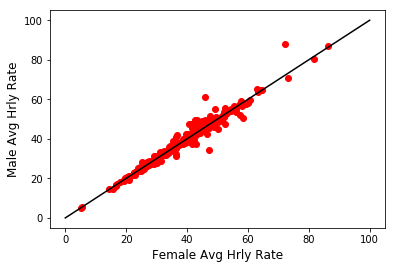

In [48]:
plt.plot(x, y, 'ro')
plt.xlabel('Female Avg Hrly Rate', fontsize=12)
plt.ylabel('Male Avg Hrly Rate', fontsize=12)
plt.plot([100, 0], [100, 0], 'k-')
plt.show()

**ANSWER: Ah! There are the fat cats! Though generally the data is very well linear--meaning that overall, female hourly rates and male hourly rates rise proportionally--it appears that at higher wage levels there are some outlying relatively high male wages, and not vice versa. The line represents a linear relationship between female and male hourly wages. One can observe two outlying deviations from this line, both in the male average hourly rate direction. However, though there are outliers,**